# Example case of fitting a spherical cluster. #

This thread shows how to use _M2_ProposalTools_ to fit a spherical cluster model to an input fits file.

In [1]:
### Useful libraries
import numpy as np
import astropy.units as u
from astropy.io import fits 
#### Modules within our library
import M2_ProposalTools.WorkHorse as WH
import M2_ProposalTools.MakeRMSmap as MRM
import M2_ProposalTools.ModelFitting as MF

In the simulate observation notebook, we created a fits file that had an unsmoothed output (that is, a beam-convolved and filtered image, but not further smoothing) and a corresponding sensitivity map. This notebook takes that fits file as its input.

In [2]:
outdir   = "/home/data/MUSTANG2/SimulatedObservations/LightWeight/"
InputStr = "0z5_6m0_3s5_3s5_10h0_10h0_4p0"
filename = "SimulatedObs_WIKID_"+InputStr+".fits"

We also need to know the redshift and would like to have an initial guess of the mass. I'll start with the known mass because an output figure will display the A10 pressure profile for that mass (and we select the option Dist=True to reflect that our simulated cluster assumed the A10 disturbed pressure profile).

In [3]:
M5_14    = 6.0                     # We leave this separate as we'll want to reference this below
M500     = M5_14*1e14*u.M_sun      # Make M500 a quantity in solar masses
z        = 0.5                     # The redshift

We'll actually feed in the HDUList to a routine. Finally, let's add a few other inputs for the fitting.

kpc per arcsecond:  6.103926332085241
[2.42406841e-05 1.27646661e-03] 12 60.356124302892106 4.0
Bins start with:  [  5.           7.16913544  10.27930058  14.73873962  21.1328041
  30.30078695  43.4460891   62.29417939  89.3190818  128.0681189
 183.62753792 263.29013787]
Bins are now:  [  5.          15.          25.          35.          45.04160553
  57.96417797  74.59427541  95.99559795 123.53702445 158.98016926
 204.59205919 263.29013787]


/home/charles/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
  0%|          | 7/10000 [00:08<3:25:25,  1.23s/it]/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/analytic_integrations.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  yint = 1.0 - (rin/rout)**(2-alpha)  # I could leave out the second term...
100%|██████████| 10000/10000 [3:15:46<00:00,  1.17s/it] 


###########################################################################
R500 found to be:  0.0008767332505446445  radians
M500 found to be:  6.561438829808715  \pm  0.6281123315709831  1e14 M_sun
P500 found to be:  0.006209837853868093 keV / cm3
Systematic error on M500:  0.046914758483217245  1e14 M_sun
###########################################################################
[[-5.49543132e-07  2.08477020e-07  2.22332523e-07]
 [ 2.92119898e-01  4.53698152e-02  4.49589870e-02]
 [ 2.09847494e-01  1.66665041e-02  1.58941948e-02]
 [ 1.53398039e-01  1.04398893e-02  9.92442012e-03]
 [ 1.19994058e-01  7.68433116e-03  7.50693536e-03]
 [ 9.45220077e-02  5.75809651e-03  5.52841379e-03]
 [ 7.14423356e-02  4.17215296e-03  4.04213756e-03]
 [ 5.12140302e-02  3.22275109e-03  3.17915856e-03]
 [ 3.13369350e-02  2.79153971e-03  2.62862711e-03]
 [ 2.02924824e-02  2.61140456e-03  2.36881868e-03]
 [ 5.97477662e-03  2.01586079e-03  1.81862655e-03]
 [ 5.51574274e-03  2.40543970e-03  2.14164002e-03]
 [

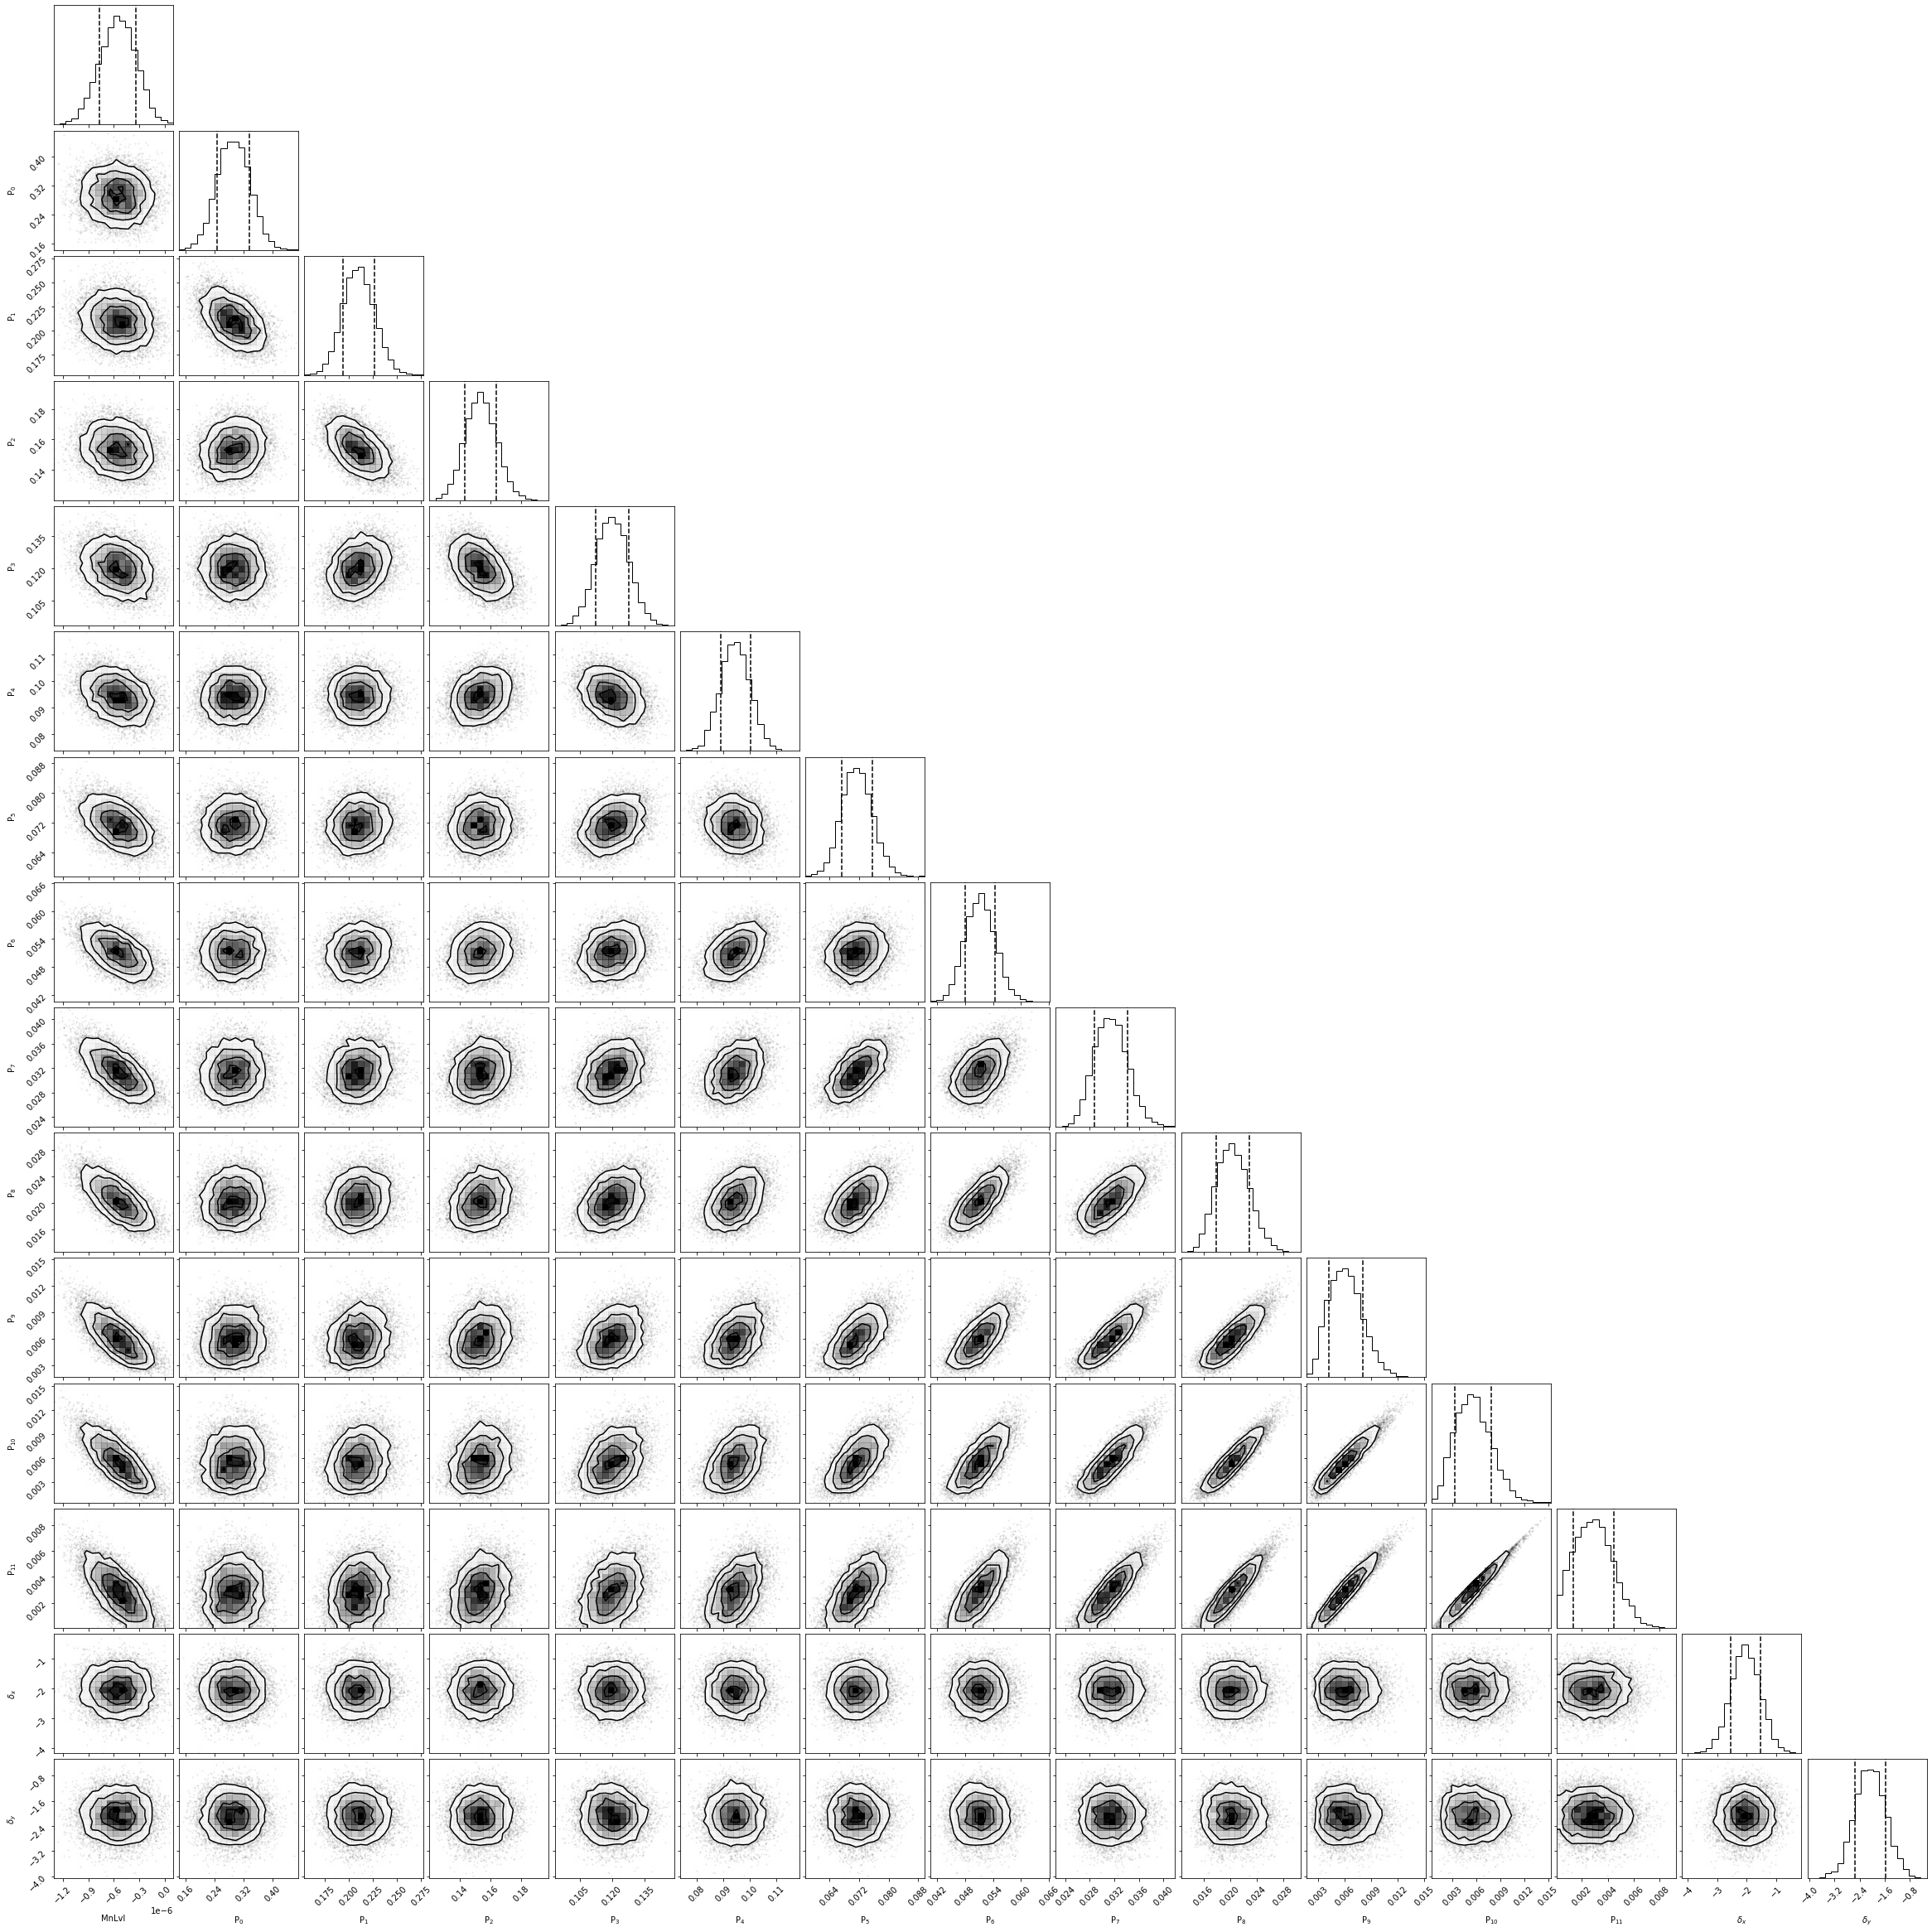

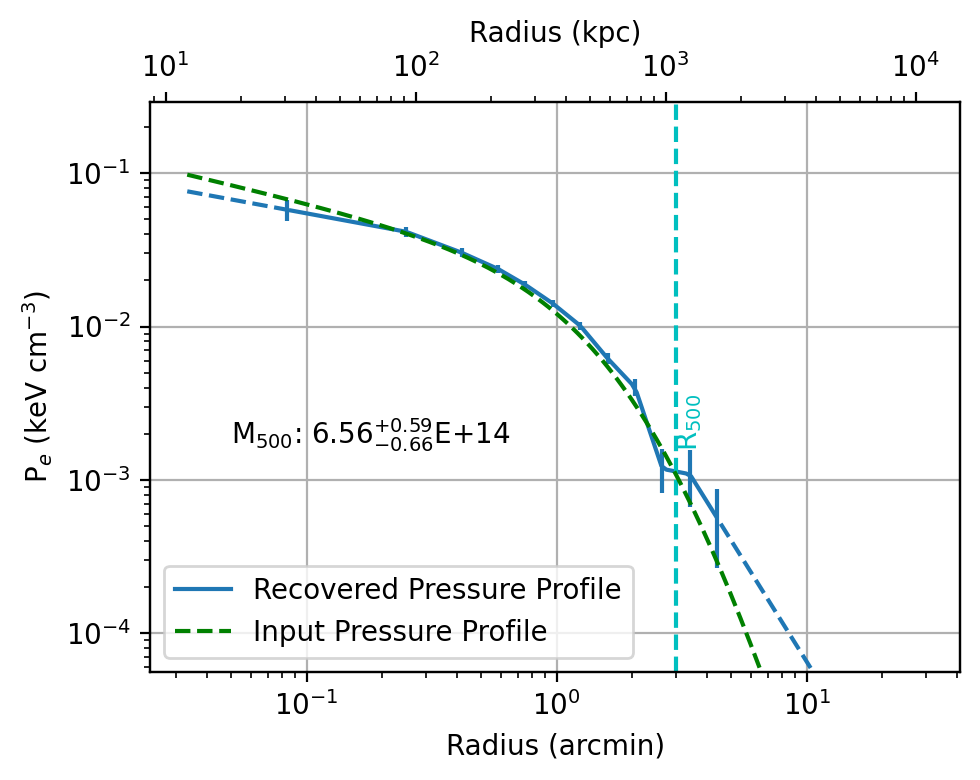

In [4]:
inputHDU = fits.open(outdir+filename)
nsteps   = 10000
nsstr    = "_"+repr(nsteps)+"steps"
outbase = "NP_fit_"+InputStr+nsstr+"_corner.png"
MF.fit_spherical_model(z,M500,inputHDU,outdir=outdir,nsteps=nsteps,outbase=outbase,Dist=True,WIKID=True)   # 100 for testing purposes

The uncertainties on many bins are small, but we see that the approximate filtering has induced a bias.

There are a couple sources of bias in this lightweight version:
#. The noise injected for simulating fits adds some pink noise, but the fitting statistic just uses white noise.
#. (and likely the more important reason) the signal was filtered per pointing in the simulated observation, but the fitting procedure filters the model (entire image) with a single pointing.

Recall, the goal of this package is to be lightweight and make approximations which allow for quick computation (though this fitting took a while), which generally is intended for MUSTANG-2 proposals and not for actual science results. Here, the goal is to quickly show that WIKID will result in significant improvements in mapping extended structure, where we take the fitting of pressure profiles in galaxy clusters as an indicative assessment.